In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


Q1. Design a IIR Butterworth filter with following specifications: Min Passband gain = 0.89, Ωp = 30 Hz, Max Stopband gain = 0.2, Ωs = 75 Hz. Sampling frequency = 200 Hz. (Use buttord, butter functions). Plot the frequency response

C:\Users\sharm\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


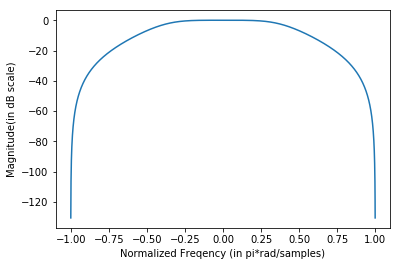

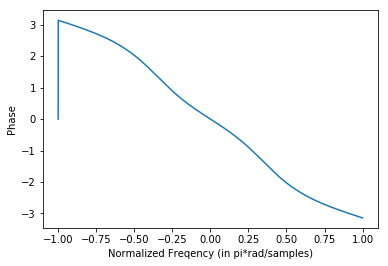

In [24]:
c = np.arange(-1*np.pi,1*np.pi,2*np.pi/4096)
order,wn = sig.buttord(30.0/100.0,75.0/100.0,20*np.log10(0.89),20*np.log10(0.2))
b,a=sig.butter(order,wn,'low')
w,h = sig.freqz(b,a,c)
hdb = 20*np.log10(np.abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude(in dB scale)')
plt.show()
plt.plot(w/np.pi,np.angle(h))
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Phase')
plt.show()

Q2. Use bilinear transformation to design a high pass filter using butterworth
approximation with the following parameters: Stop band ripple ≤ 15dB,
Pass band edge = 150 Hz, Max pass band attenuation 1dB, Stop band
edge 100 Hz and sampling frequency 1kHz.

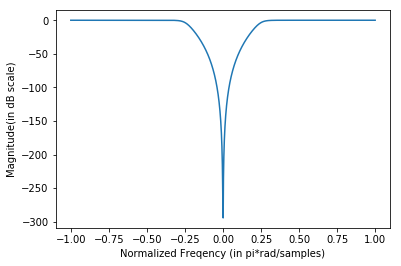

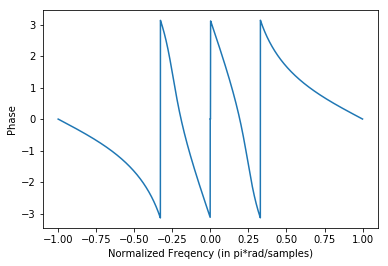

In [9]:
c = np.arange(-np.pi,np.pi,2*np.pi/4096)
order,wn = sig.buttord(150*2*np.pi,100*2*np.pi,1,15,analog='True')
b,a=sig.butter(order,wn,'high',analog='True')
b1,a1 = sig.bilinear(b,a,fs=1000)
w,h = sig.freqz(b1,a1,c)
hdb = 20*np.log10(np.abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude(in dB scale)')
plt.show()
plt.plot(w/np.pi,np.angle(h))
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Phase')
plt.show()

Q3. Consider the ideal low-pass filter at ωc = 0.2π. Truncate the impulse
response to a window −L ≤ n ≤ L and plot the magnitude response.
Consider L = 5,10,40.

[0. 0. 0. 0. 0. 1.]


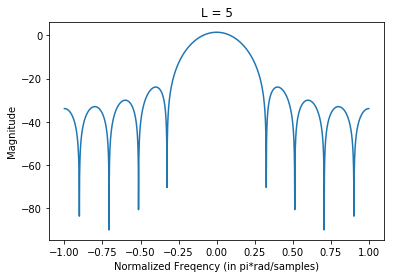

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


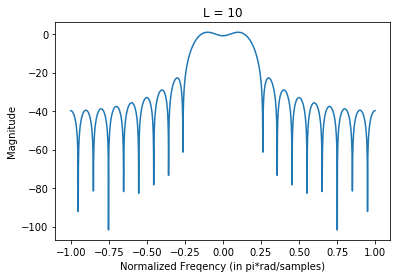

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


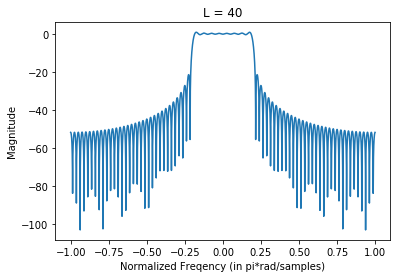

In [11]:
L = [5,10,40]
c = np.arange(-np.pi,np.pi,2*np.pi/4096)
for i in L:
    n = np.arange(-i,i+1,1)
    hn = (0.2)*np.sinc(0.2*n)
    a = np.concatenate((np.zeros(i),[1]))
    print(a)
    w,h = sig.freqz(hn,a,c)
    hdb = 20*np.log10(np.abs(h))
    plt.plot(w/np.pi,hdb)
    plt.xlabel('Normalized Freqency (in pi*rad/samples)')
    plt.ylabel('Magnitude')
    plt.title('L = '+ str(i))
    plt.show()
    
    

Q4. Compare the properties (Main lobe width, min attenuation in stop band)
of the following windows: rectangular, Bartlett, Hanning and Blackman
with length 51.

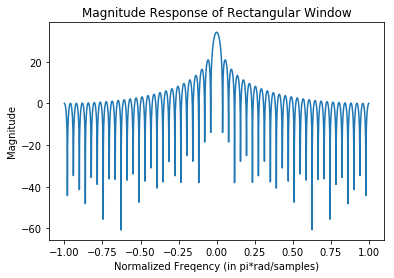

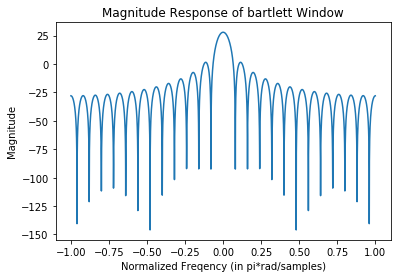

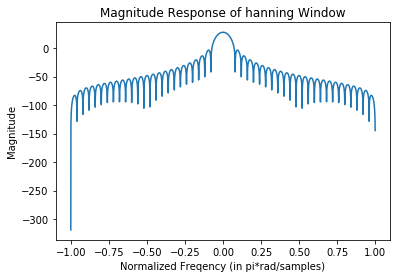

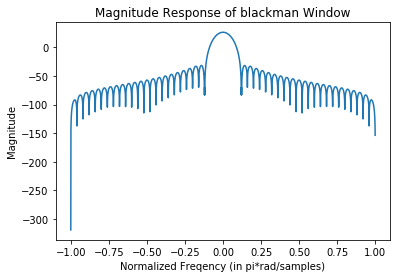

In [25]:
M = 51
c = np.arange(-np.pi,np.pi,2*np.pi/4096)

#rectangluar window
rect = sig.boxcar(M)
w,h = sig.freqz(rect,[1],c)
hdb = 20*np.log10(np.abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of Rectangular Window')
plt.show()

#bartlett window
bart = sig.bartlett(M)
w,h = sig.freqz(bart,[1],c)
hdb = 20*np.log10(np.abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of bartlett Window')
plt.show()

#hanning window
hann = sig.hanning(M)
w,h = sig.freqz(hann,[1],c)
hdb = 20*np.log10(np.abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of hanning Window')
plt.show()

#blackmann window
blackman = sig.blackman(M)
w,h = sig.freqz(blackman,[1],c)
hdb = 20*np.log10(np.abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of blackman Window')
plt.show()

Q5. Design a lowpass filter with ωc using rectangular and Blackman windows.
Plot the magnitude and zero locations. Take length of filter as 20.

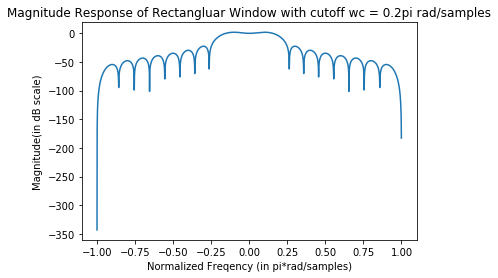

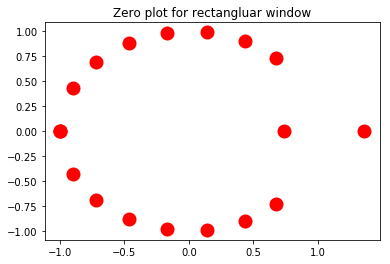

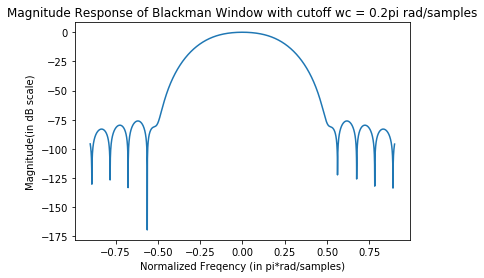

C:\Users\sharm\Anaconda2\lib\site-packages\scipy\signal\filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


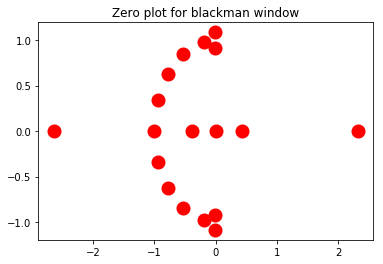

In [12]:
L = 20
wc = 0.2 #Assumption
h = sig.firwin(20,wc,window='boxcar')
c = np.arange(-1*np.pi,1*np.pi,2*np.pi/4096)
w,h1 = sig.freqz(h,[1],c)
h1db = 20*np.log10(abs(h1))
plt.plot(w/np.pi,h1db)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude(in dB scale)')
plt.title('Magnitude Response of Rectangluar Window with cutoff wc = 0.2pi rad/samples')
plt.show()
z,p,k = sig.tf2zpk(h,[1])
t1 = plt.plot(z.real,z.imag,'ro',p.real,p.imag,'rx')
plt.setp(t1,markersize=12.0,markeredgewidth=2.0)
plt.title('Zero plot for rectangluar window')
plt.show()

h = sig.firwin(20,wc,window='blackman')
c = np.arange(-0.9*np.pi,0.9*np.pi,2*np.pi/4096)
w,h1 = sig.freqz(h,[1],c)
h1db = 20*np.log10(abs(h1))
plt.plot(w/np.pi,h1db)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude(in dB scale)')
plt.title('Magnitude Response of Blackman Window with cutoff wc = 0.2pi rad/samples')
plt.show()
z,p,k = sig.tf2zpk(h,[1])
t1 = plt.plot(z.real,z.imag,'ro',p.real,p.imag,'rx')
plt.setp(t1,markersize=12.0,markeredgewidth=2.0)
plt.title('Zero plot for blackman window')
plt.show()

Q6. Design an LPF and HPF with the following specifications with a Kaiser
window. ωs = 0.6π, ωp = 0.4π, δ = 0.001, ωc = (ωs + ωp)/2 What is the
order of the filter ? (Use kaiserord and kaiser functions )

('Length of Kaiser Window = ', 38)
('Beta = ', 5.65326)


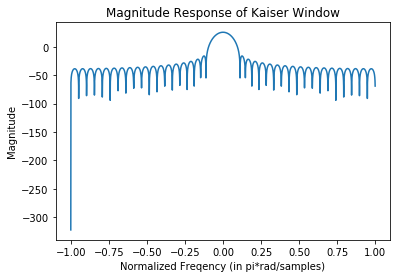

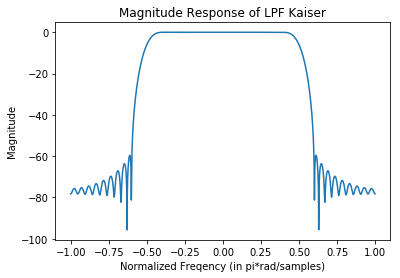

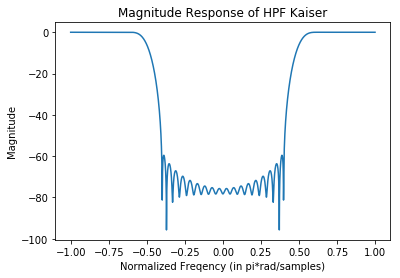

In [8]:
ws = 0.6
wp =0.4
delta = 0.001
wc = 0.5
c = np.arange(-np.pi,np.pi,2*np.pi/4096)
m,beta = sig.kaiserord(20*np.log10(delta),ws-wp)
print('Length of Kaiser Window = ', m)
print('Beta = ',beta)
kaiser = sig.kaiser(m,beta)
w,h = sig.freqz(kaiser,[1],c)
hdb = 20*np.log10(np.abs(h))
plt.plot(w/np.pi,hdb)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of Kaiser Window')
plt.show()
n = np.arange(-m/2,m/2)
sinc = wc*np.sinc(wc*n)
y = sinc*kaiser

w,h1 = sig.freqz(y,[1],c)
h1db = 20*np.log10(abs(h1))
plt.plot(w/np.pi,h1db)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of LPF Kaiser')
plt.show()

sinc = wc*np.sinc(wc*n)
deltafn = np.zeros(m)
deltafn[m/2]=1
hp = deltafn - sinc
y = hp*kaiser

w,h1 = sig.freqz(y,[1],c)
h1db = 20*np.log10(abs(h1))
plt.plot(w/np.pi,h1db)
plt.xlabel('Normalized Freqency (in pi*rad/samples)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of HPF Kaiser')
plt.show()

